In [41]:
import pandas as pd
from plotnine import ggplot, aes, geom_histogram, labs, theme_minimal, geom_boxplot, theme, geom_point

In [2]:
data = pd.read_pickle("/home/kinari/genomics_database_access_course_kinari/data/output/paired_exons.pkl")

In [3]:
print(data.columns)

Index(['human_gene_id', 'mouse_gene_id', 'human_exon_id', 'mouse_exon_id',
       'homology_percent', 'mouse_homology_type', 'overall_homology_percent'],
      dtype='object')


In [4]:
print(data.head())

     human_gene_id       mouse_gene_id    human_exon_id       mouse_exon_id  \
0  ENSG00000198888  ENSMUSG00000064341  ENSE00001435714  ENSMUSE00000521519   
1  ENSG00000198763  ENSMUSG00000064345  ENSE00001435686  ENSMUSE00000521523   
2  ENSG00000198804  ENSMUSG00000064351  ENSE00001435647  ENSMUSE00000521529   
3  ENSG00000198712  ENSMUSG00000064354  ENSE00001435613  ENSMUSE00000521532   
4  ENSG00000228253  ENSMUSG00000064356  ENSE00001435286  ENSMUSE00000521534   

   homology_percent mouse_homology_type  overall_homology_percent  
0             44.72    ortholog_one2one                   77.0440  
1             31.31    ortholog_one2one                   57.3913  
2             56.10    ortholog_one2one                   90.6615  
3             42.98    ortholog_one2one                   71.3656  
4             36.27    ortholog_one2one                   46.2687  


In [5]:
print(data.shape)

(377448, 7)


In [6]:
unique_genes = data['human_gene_id'].unique()
print(f"Number of unique genes: {len(unique_genes)}")

Number of unique genes: 18504


In [7]:
# 各 human_gene_id に関連付けられた行数を計算
gene_counts = data.groupby('human_gene_id')['human_gene_id'].transform('count')

# 行数が1の遺伝子を削除
data = data[gene_counts > 1]

# 結果を確認
print(f"Number of unique genes after filtering: {data['human_gene_id'].nunique()}")

Number of unique genes after filtering: 16518


In [8]:
print(data.head())
print(data.shape)

      human_gene_id       mouse_gene_id    human_exon_id       mouse_exon_id  \
13  ENSG00000277196  ENSMUSG00000003526  ENSE00003746084  ENSMUSE00000754328   
14  ENSG00000277196  ENSMUSG00000003526  ENSE00003719550  ENSMUSE00000391738   
15  ENSG00000277196  ENSMUSG00000003526  ENSE00003723757  ENSMUSE00001263093   
16  ENSG00000277196  ENSMUSG00000003526  ENSE00003731891  ENSMUSE00001289929   
17  ENSG00000277196  ENSMUSG00000003526  ENSE00003724613  ENSMUSE00000787726   

    homology_percent mouse_homology_type  overall_homology_percent  
13              1.48   ortholog_one2many                   81.9699  
14             41.12   ortholog_one2many                   81.9699  
15             58.85   ortholog_one2many                   81.9699  
16             60.00   ortholog_one2many                   81.9699  
17             61.33   ortholog_one2many                   81.9699  
(375462, 7)


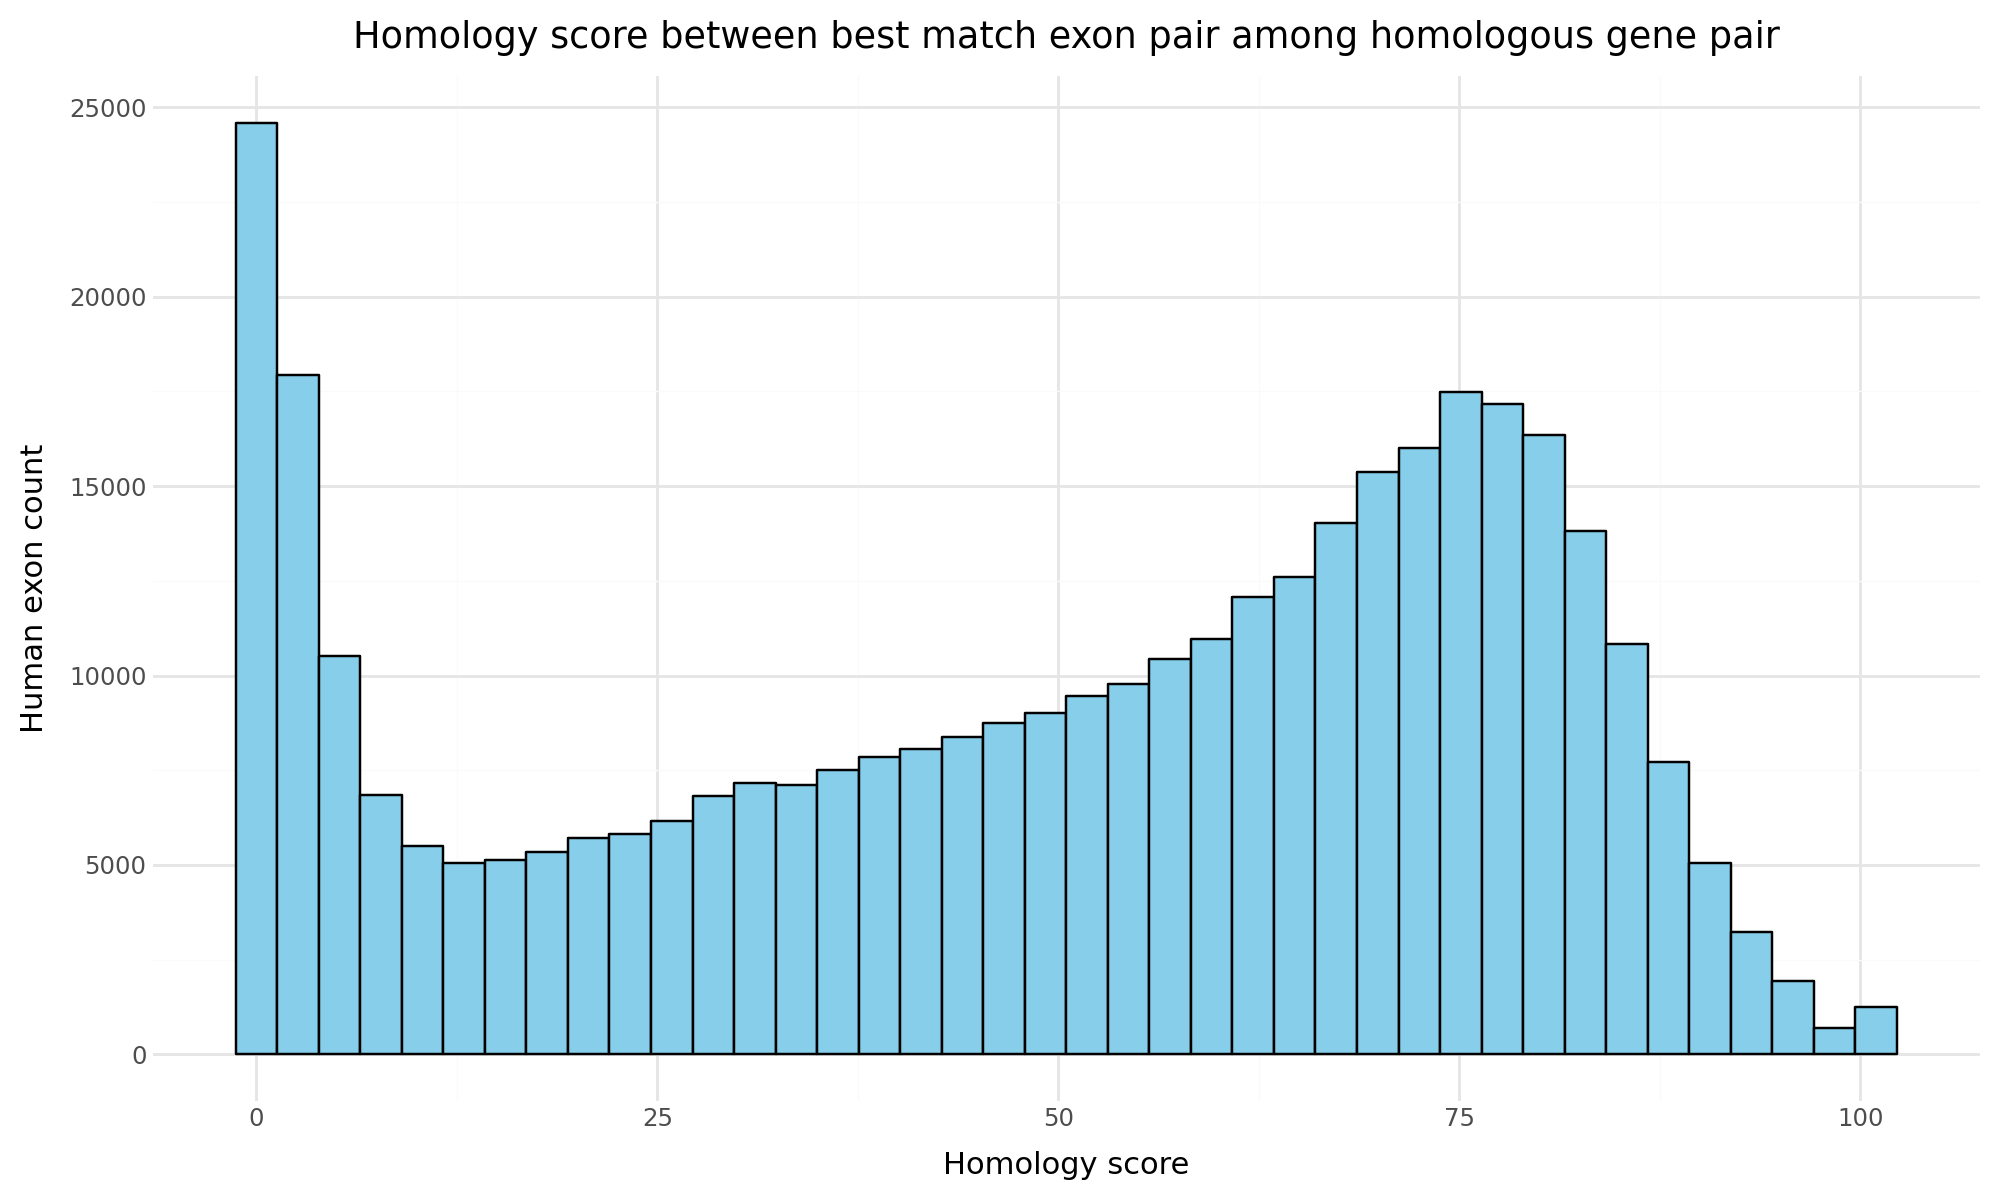

In [48]:

plot = (
    ggplot(data, aes(x="homology_percent")) +  
    geom_histogram(bins=40, fill="skyblue", color="black") +
    labs(title="Homology score between best match exon pair among homologous gene pair", x="Homology score", y="Human exon count") +
    theme_minimal() +
    theme(figure_size=(10, 6))  # Set figure size
)

display(plot)

In [49]:
data["delta_homology_percent"] = data["homology_percent"] - data["overall_homology_percent"]
print(min(data["delta_homology_percent"]), max(data["delta_homology_percent"]))

-101.0 77.5655


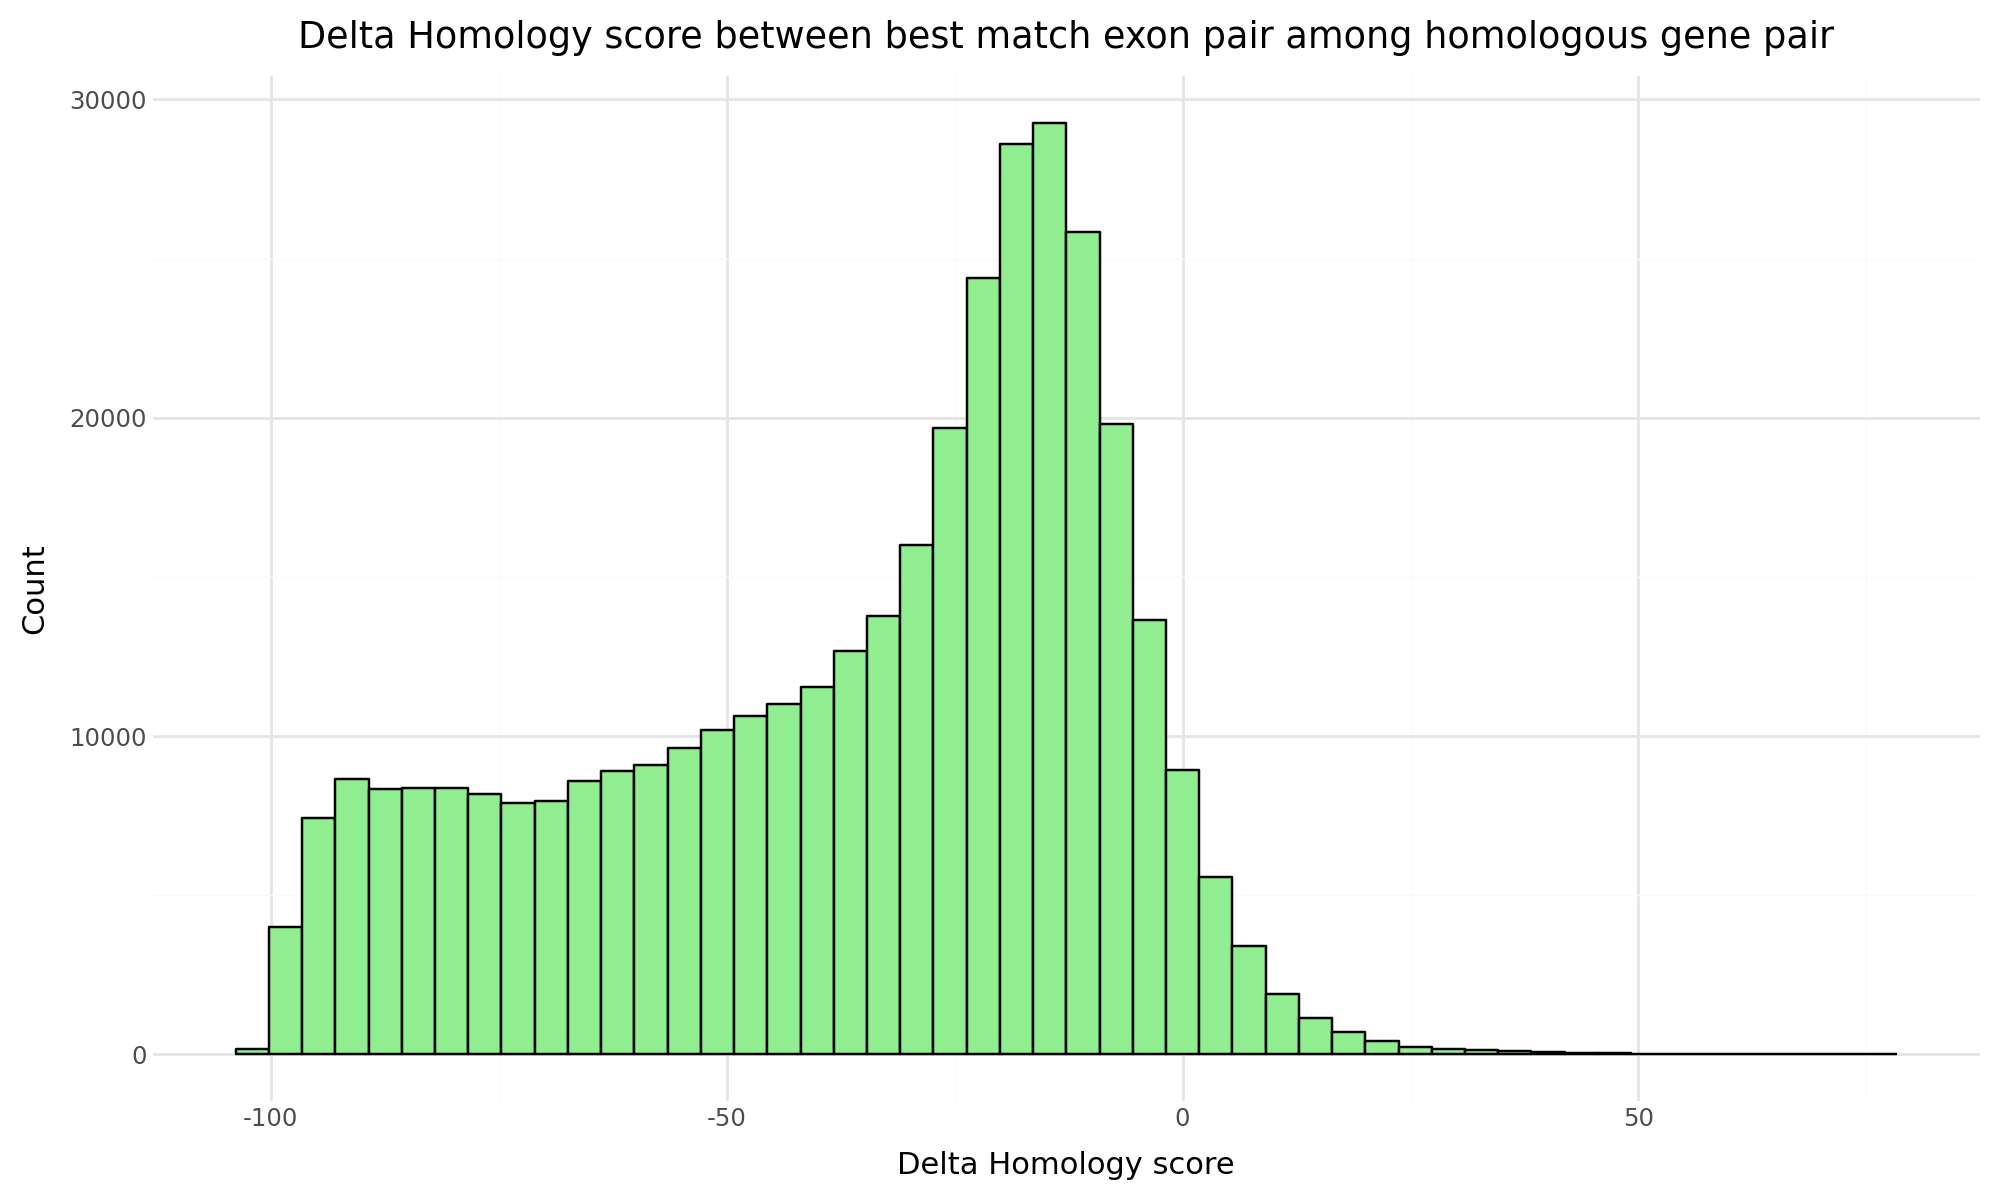

In [50]:
plot = (
    ggplot(data, aes(x="delta_homology_percent")) +
    geom_histogram(bins=50, fill="lightgreen", color="black") +
    labs(title="Delta Homology score between best match exon pair among homologous gene pair", x="Delta Homology score", y="Count") +
    theme_minimal()  # Use a minimal theme for better aesthetics
    + theme(figure_size=(10, 6))  # Set figure size
)
display(plot)